# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [0]:
# Save Figure
#fig.write_html('drive/My Drive/images/betweennessHist.html')

# Analyzing the Big Graph

## Loading the big graph and showing the details

In [3]:
dfBigGraph = pd.read_csv('drive/My Drive/data/CGCS-GraphData.csv')
dfBigGraph.describe()

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude
count,1.238953e+08,1.238953e+08,1.238953e+08,1.238953e+08,1.238953e+08,7.215359e+07,7.215359e+07,7.215359e+07,7.215359e+07,7.215359e+07,7.215359e+07
mean,5.566990e+05,7.490687e-01,5.571470e+05,1.505715e+07,6.460121e+01,2.400772e+00,2.405289e+00,5.936289e-01,-3.621679e+01,6.262336e-01,-3.643658e+01
std,5.794484e+04,9.638940e-01,5.799030e+04,3.047018e+07,2.870352e+03,1.766937e+00,1.769288e+00,2.391271e+01,1.080029e+02,2.387852e+01,1.081189e+02
min,4.567590e+05,0.000000e+00,4.567590e+05,-2.702016e+09,-1.000000e+00,0.000000e+00,0.000000e+00,-3.789420e+01,-1.793750e+02,-3.789420e+01,-1.793750e+02
25%,5.066630e+05,0.000000e+00,5.071510e+05,8.212526e+06,1.000000e+00,1.000000e+00,1.000000e+00,-2.441490e+01,-1.584460e+02,-2.440350e+01,-1.588930e+02
50%,5.566020e+05,1.000000e+00,5.574750e+05,1.619336e+07,1.000000e+00,2.000000e+00,2.000000e+00,3.914150e-01,-4.081200e+01,4.157700e-01,-4.082980e+01
75%,6.065080e+05,1.000000e+00,6.073850e+05,2.410743e+07,1.000000e+00,4.000000e+00,4.000000e+00,2.379140e+01,8.754490e+01,2.374010e+01,8.736400e+01
max,6.576680e+05,6.000000e+00,6.576700e+05,3.153600e+07,8.166740e+06,5.000000e+00,5.000000e+00,4.983240e+01,1.633690e+02,4.983240e+01,1.633690e+02


## Analyzing and plotting some of the channels for testing

### Co-Authorship channel

In [0]:
dfcoAuthor = dfBigGraph[dfBigGraph["eType"] == 4]

In [0]:
dfcoAuthor = dfcoAuthor[list(["Source", "Target", "Weight"])]

In [0]:
fig = px.scatter(dfcoAuthor, x="Source", y="Target", hover_data=['Weight'])
fig.update_layout(yaxis_type='category', xaxis_type='category',
                  title_text='Scatter plot Co-authorship in the big graph')
fig.show()

In [0]:
fig3 = px.scatter(dfcoAuthor, x="Target", y="Source", hover_data=['Weight'])
fig3.update_layout(yaxis_type='category', xaxis_type='category',
                  title_text='Scatter plot Co-authorship in the big graph')
fig3.show()

In [0]:
#import os

#if not os.path.exists("drive/My Drive/images"):
#    os.mkdir("drive/My Drive/images")

In [0]:
#import plotly.offline as offline
#offline.init_notebook_mode()

In [0]:
fig.write_html("drive/My Drive/file.html")

In [0]:
#fig.write_image("drive/My Drive/image.svg")

In [0]:
fig2 = px.density_heatmap(dfcoAuthor, x=dfcoAuthor["Source"].astype('category'), y=dfcoAuthor["Target"].astype('category'), hover_data=['Weight'], z='Weight', histfunc='sum')
#fig2.update_layout(yaxis_type='category', xaxis_type='category',
#                  title_text='Heatmap Co-authorship in the big graph')
fig2.show()

### Communication Channel

In [0]:
dfCommunication = dfBigGraph[(dfBigGraph["eType"] == 0) | (dfBigGraph["eType"] == 1)]

In [0]:
dfCommunication = dfBigGraph[["Source", "Target"]][(dfBigGraph["eType"] == 0) | (dfBigGraph["eType"] == 1)]
#print(dfCommunication)

In [11]:
len(dfCommunication)

119323696

In [0]:
bigGraph = nx.from_pandas_edgelist(dfBigGraph[0:30000000], "Source", "Target")

In [15]:
bigGraph.number_of_edges()

11480158

In [13]:
bigGraph.is_directed()

False

In [14]:
nx.number_connected_components(bigGraph)

1

In [17]:
nx.is_connected(bigGraph)

True

#### Simplified graph

## Trying to save the whole graph in a network

In [0]:
#bigGraphG = nx.DiGraph()

In [0]:
#bigGraphNodesTuple = [tuple([x, y]) for x, y in zip(dfBigGraph[(dfBigGraph["eType"] == 0) | (dfBigGraph["eType"] == 1)]["Source"], 
#                                                  dfBigGraph[(dfBigGraph["eType"] == 0) | (dfBigGraph["eType"] == 1)]["Target"])]

In [0]:
#bigGraphG.add_edges_from(bigGraphNodesTuple)

# Analyzing quantitive measures for the Template and Graphs of question 1

## loading the graphs into pandas dataframes

In [0]:
dfTemplate = pd.read_csv('drive/My Drive/data/CGCS-Template.csv')
dfGraph1 = pd.read_csv('drive/My Drive/data/Q1-Graph1.csv')
dfGraph2 = pd.read_csv('drive/My Drive/data/Q1-Graph2.csv')
dfGraph3 = pd.read_csv('drive/My Drive/data/Q1-Graph3.csv')
dfGraph4 = pd.read_csv('drive/My Drive/data/Q1-Graph4.csv')
dfGraph5 = pd.read_csv('drive/My Drive/data/Q1-Graph5.csv')

### Numerical data for question 1 graphs

#### Creating the graphs

In [0]:
templateG = nx.DiGraph()
graph1G = nx.DiGraph()
graph2G = nx.DiGraph()
graph3G = nx.DiGraph()
graph4G = nx.DiGraph()
graph5G = nx.DiGraph()

In [0]:
templateG = nx.MultiDiGraph()
graph1G = nx.MultiDiGraph()
graph2G = nx.MultiDiGraph()
graph3G = nx.MultiDiGraph()
graph4G = nx.MultiDiGraph()
graph5G = nx.MultiDiGraph()

In [0]:
# Putting the Source and Target values in tuples for each corresponding graph All channels
templateNodesTuple = [tuple([x, y]) for x, y in zip(dfTemplate["Source"], dfTemplate["Target"])]
graph1NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph1["Source"], dfGraph1["Target"])]
graph2NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph2["Source"], dfGraph2["Target"])]
graph3NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph3["Source"], dfGraph3["Target"])]
graph4NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph4["Source"], dfGraph4["Target"])]
graph5NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph5["Source"], dfGraph5["Target"])]

In [0]:
tuple(zip([1,2],[2,3],[1,2]))

((1, 2, 1), (2, 3, 2))

In [0]:
# Putting the Source and Target values in tuples for each corresponding graph Communication channel
templateNodesTuple = [tuple([x, y]) for x, y in zip(dfTemplate[(dfTemplate["eType"] == 0) | (dfTemplate["eType"] == 1)]["Source"],
                      dfTemplate[(dfTemplate["eType"] == 0) | (dfTemplate["eType"] == 1)]["Target"])]
graph1NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph1[(dfGraph1["eType"] == 0) | (dfGraph1["eType"] == 1)]["Source"], 
                                                  dfGraph1[(dfGraph1["eType"] == 0) | (dfGraph1["eType"] == 1)]["Target"])]
graph2NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph2[(dfGraph2["eType"] == 0) | (dfGraph2["eType"] == 1)]["Source"], 
                                                  dfGraph2[(dfGraph2["eType"] == 0) | (dfGraph2["eType"] == 1)]["Target"])]
graph3NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph3[(dfGraph3["eType"] == 0) | (dfGraph3["eType"] == 1)]["Source"], 
                                                  dfGraph3[(dfGraph3["eType"] == 0) | (dfGraph3["eType"] == 1)]["Target"])]
graph4NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph4[(dfGraph4["eType"] == 0) | (dfGraph4["eType"] == 1)]["Source"], 
                                                  dfGraph4[(dfGraph4["eType"] == 0) | (dfGraph4["eType"] == 1)]["Target"])]
graph5NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph5[(dfGraph5["eType"] == 0) | (dfGraph5["eType"] == 1)]["Source"], 
                                                  dfGraph5[(dfGraph5["eType"] == 0) | (dfGraph5["eType"] == 1)]["Target"])]

In [0]:
# Creating graph objects from the tuples
templateG.add_edges_from(templateNodesTuple)
graph1G.add_edges_from(graph1NodesTuple)
graph2G.add_edges_from(graph2NodesTuple)
graph3G.add_edges_from(graph3NodesTuple)
graph4G.add_edges_from(graph4NodesTuple)
graph5G.add_edges_from(graph5NodesTuple)
print("")

In [0]:
testG = nx.MultiDiGraph()

In [0]:
max([x for x, y, z in zip(dfTemplate["Source"], dfTemplate["Target"], dfTemplate["Time"])])

620120

In [0]:
a = [testG.add_edge(x, y,time = z) for x, y, z in zip(dfTemplate["Source"], dfTemplate["Target"], dfTemplate["Time"])]

In [0]:
print(min([x for y, x in list(testG.in_degree())]),
      max([x for y, x in list(testG.in_degree())]))

0 72


In [0]:
testG2 = nx.MultiDiGraph()
testTuple = [tuple([x, y]) for x, y in zip(dfTemplate["Source"], dfTemplate["Target"])]

In [0]:
a = testG2.add_edges_from(testTuple)

In [0]:
print(min([x for y, x in list(testG2.in_degree())]),
      max([x for y, x in list(testG2.in_degree())]))

0 72


#### heatmap

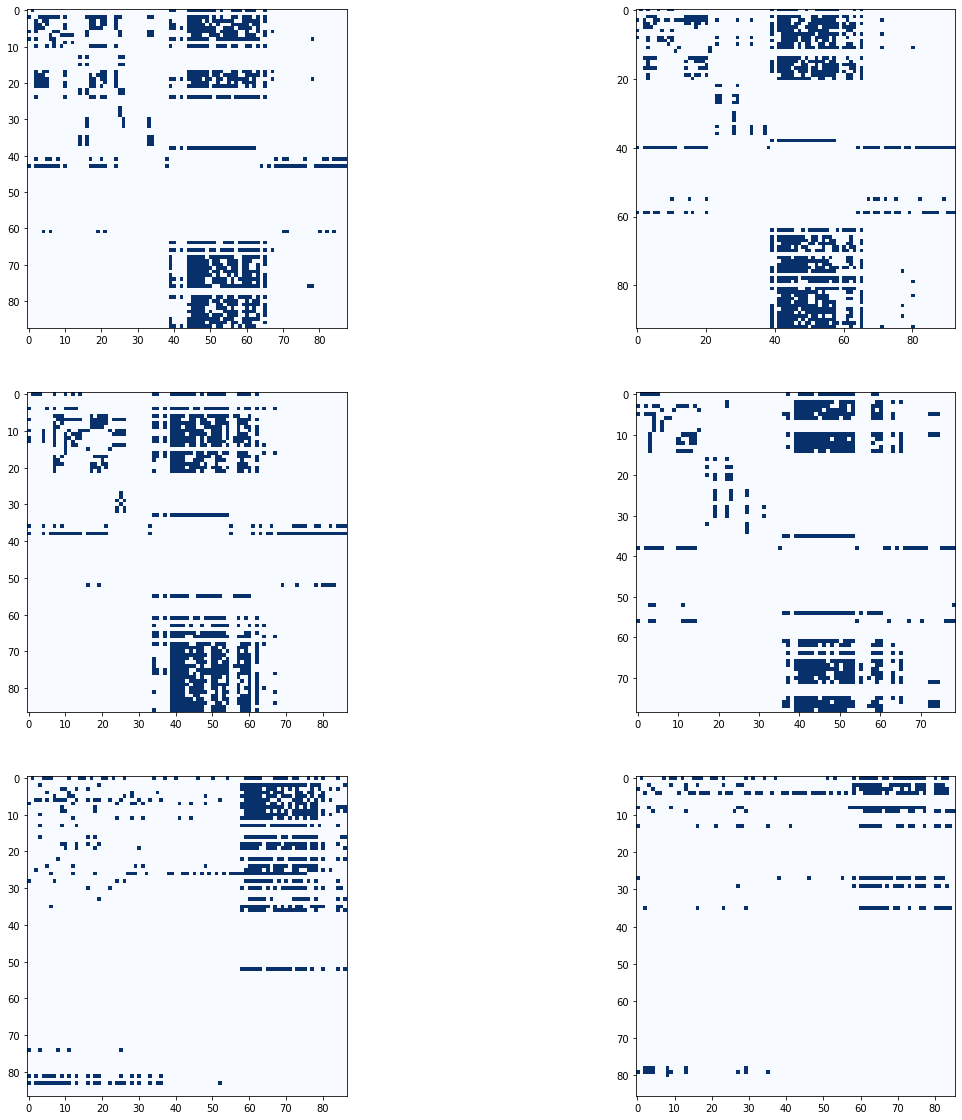

In [0]:
# nx.to_numpy_matrix(graph1G)
import matplotlib.cm as cm

# Make an array with ones in the shape of an 'X'

fig = plt.figure(figsize=(20, 20)) 

a = nx.to_numpy_matrix(templateG)
ax1 = fig.add_subplot(321)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)

a = nx.to_numpy_matrix(graph1G)
ax1 = fig.add_subplot(322)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)

a = nx.to_numpy_matrix(graph2G)
ax1 = fig.add_subplot(323)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)

a = nx.to_numpy_matrix(graph3G)
ax1 = fig.add_subplot(324)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)

a = nx.to_numpy_matrix(graph4G)
ax1 = fig.add_subplot(325)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)

a = nx.to_numpy_matrix(graph5G)
ax1 = fig.add_subplot(326)
ax1.imshow(a, interpolation=None, cmap=cm.Blues)


plt.show()

#### degree

In [0]:
degreeTemplate = nx.degree(templateG)
degreeGraph1 = nx.degree(graph1G)
degreeGraph2 = nx.degree(graph2G)
degreeGraph3 = nx.degree(graph3G)
degreeGraph4 = nx.degree(graph4G)
degreeGraph5 = nx.degree(graph5G)

In [0]:
print(dict((y, x) for x, y in degreeTemplate))

{38: 0, 1: 640784, 208: 41, 93: 34, 102: 37, 98: 27, 55: 40, 116: 39, 56: 65, 54: 67, 105: 47, 5: 66, 18: 42, 4: 503218, 7: 76, 13: 644226, 74: 43, 85: 56, 64: 57, 95: 58, 120: 63, 76: 45, 10: 520660, 3: 606730, 9: 71, 6: 72, 24: 580426, 36: 620120, 30: 567195, 33: 503701, 27: 589943, 19: 64, 22: 537281, 28: 523927, 23: 31, 25: 616315, 26: 49, 21: 46, 17: 60, 20: 61, 16: 59, 14: 55}


In [0]:
print("centrality degreerange for All channel in Template: ",
      min(list(dict((x, y) for x, y in degreeTemplate).values())), 
      max(list(dict((x, y) for x, y in degreeTemplate).values())))

print("centrality degree range for All channel in graph 1: ",
      min(list(dict((x, y) for x, y in degreeGraph1).values())), 
      max(list(dict((x, y) for x, y in degreeGraph1).values())))

print("centrality degree range for All channel in graph 2: ",
      min(list(dict((x, y) for x, y in degreeGraph2).values())), 
      max(list(dict((x, y) for x, y in degreeGraph2).values())))

print("centrality degree range for All channel in graph 3: ",
      min(list(dict((x, y) for x, y in degreeGraph3).values())), 
      max(list(dict((x, y) for x, y in degreeGraph3).values())))

print("centrality degree range for All channel in graph 4: ",
      min(list(dict((x, y) for x, y in degreeGraph4).values())), 
      max(list(dict((x, y) for x, y in degreeGraph4).values())))

print("centrality degree range for All channel in graph 5: ",
      min(list(dict((x, y) for x, y in degreeGraph5).values())), 
      max(list(dict((x, y) for x, y in degreeGraph5).values())))

centrality degreerange for All channel in Template:  1 208
centrality degree range for All channel in graph 1:  1 135
centrality degree range for All channel in graph 2:  1 192
centrality degree range for All channel in graph 3:  1 68
centrality degree range for All channel in graph 4:  1 64
centrality degree range for All channel in graph 5:  1 72


In [0]:
fig = make_subplots(rows=3, cols=2)

# autobinx=True

df = pd.DataFrame(list(zip([y for x, y in degreeTemplate], [x for x, y in degreeTemplate])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph1], [x for x, y in degreeGraph1])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph2], [x for x, y in degreeGraph2])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph3], [x for x, y in degreeGraph3])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph4], [x for x, y in degreeGraph4])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degreeGraph5], [x for x, y in degreeGraph5])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(barmode='overlay')
fig.show()

In [0]:

fig = go.Figure()

df = pd.DataFrame(list(zip([y for x, y in degreeTemplate], [x for x, y in degreeTemplate])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in degreeGraph1], [x for x, y in degreeGraph1])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in degreeGraph2], [x for x, y in degreeGraph2])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in degreeGraph3], [x for x, y in degreeGraph3])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in degreeGraph4], [x for x, y in degreeGraph4])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))

df = pd.DataFrame(list(zip([y for x, y in degreeGraph5], [x for x, y in degreeGraph5])))
x = df[0]
fig.add_trace(go.Histogram(x=x, xbins=dict(start=0, end=208, size=208/8)))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

#### Ego Network: 
  * represent the network of the node with the largest degree in the network 

Name: 
Type: DiGraph
Number of nodes: 20
Number of edges: 19
Average in degree:   0.9500
Average out degree:   0.9500


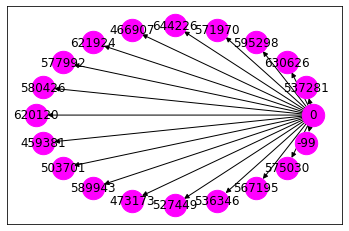

In [0]:
ego_net = nx.ego_graph(templateG, n=0)
print(nx.info(ego_net))
fig = plt.Figure(figsize=(30,30))
pos=nx.shell_layout(ego_net)

nx.draw_networkx(ego_net, pos, node_size=500, node_color='magenta')

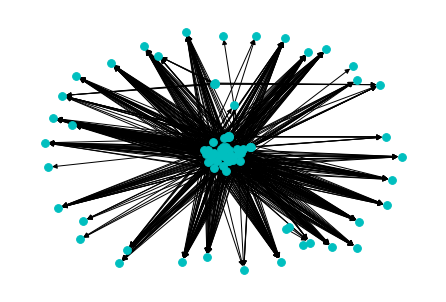

number of nodes:  88
number of edges:  859


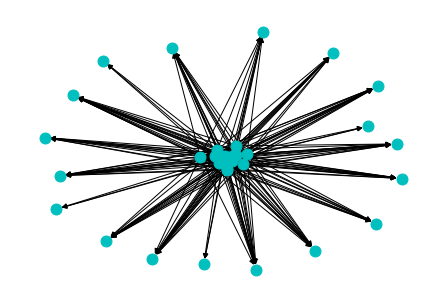

In [0]:
fig = plt.Figure(figsize=(30,30))
# Copy a graph model
G = templateG
# Let's draw the graph
pos= nx.spring_layout(G)
nx.draw(G, pos, node_color='c', node_size=60 ,with_labels=False)
plt.show()
# find node with largest degree
node_degree = G.degree()
# calculate number of nodes
print("number of nodes: ", G.order())
# calculate number of edges
print("number of edges: ", G.size())
# find node with the largest degree
node_degree= G.degree()
series = pd.Series(dict(node_degree))
largest_deg = series.idxmax()
degree = series.max()
# Create ego graph of node with the largest degree
node_ego= nx.ego_graph(G,largest_deg)
# Draw ego graph
pos= nx.spring_layout(node_ego)
nx.draw(node_ego, pos, node_color='c', node_size=120, with_labels=False)
plt.show()

In [0]:
#TODO
#Add the Ego Network with two hops

#### 

In [0]:
max([y for x, y in node_degree])

47

In [0]:
series = pd.Series(dict(node_degree))
series.idxmax()
series.max()

47

In [0]:
node_degree

DiDegreeView({0: 23, -99: 1, 41: 47, 34: 34, 37: 35, 27: 38, 40: 31, 39: 29, 65: 30, 67: 5, 47: 37, 66: 1, 657187: 2, 78: 4, 81: 7, 80: 4, 70: 13, 43: 36, 56: 36, 57: 35, 58: 34, 63: 37, 77: 4, 79: 4, 45: 40, 69: 10, 76: 7, 82: 1, 83: 1, 84: 1, 73: 3, 75: 3, 74: 3, 71: 9, 72: 6, 87: 4, 85: 4, 86: 4, 2: 24, 630626: 24, 536346: 13, 510031: 18, 520660: 10, 552988: 36, 567195: 30, 527449: 36, 459381: 36, 595298: 36, 466907: 33, 589943: 27, 577992: 19, 537281: 22, 523927: 28, 580426: 24, 595581: 23, 642329: 25, 503701: 33, 571970: 25, 644226: 13, 632961: 26, 473173: 36, 620120: 36, 621924: 23, 616315: 25, 29: 21, 575030: 26, 31: 23, 503218: 4, 33: 21, 35: 17, 36: 20, 38: 19, 42: 18, 44: 17, 46: 21, 48: 17, 49: 26, 640784: 1, 606730: 3, 52: 20, 53: 16, 54: 19, 55: 14, 59: 16, 60: 17, 61: 20, 62: 19, 64: 19})

#### Centrality Degree

In [0]:
degree_centralityTemplate = nx.degree_centrality(templateG)
degree_centralityGraph1 = nx.degree_centrality(graph1G)
degree_centralityGraph2 = nx.degree_centrality(graph2G)
degree_centralityGraph3 = nx.degree_centrality(graph3G)
degree_centralityGraph4 = nx.degree_centrality(graph4G)
degree_centralityGraph5 = nx.degree_centrality(graph5G)

In [0]:
print(degree_centralityGraph5)

{619322: 0.8470588235294118, 590442: 0.011764705882352941, 594308: 0.5882352941176471, 549840: 0.32941176470588235, 524153: 0.6235294117647059, 629769: 0.011764705882352941, 461577: 0.011764705882352941, 547205: 0.011764705882352941, 483784: 0.5764705882352941, 631903: 0.32941176470588235, 549891: 0.047058823529411764, 632485: 0.011764705882352941, 657173: 0.11764705882352941, 477657: 0.6235294117647059, 620947: 0.011764705882352941, 492039: 0.023529411764705882, 616453: 0.3529411764705882, 483999: 0.023529411764705882, 644754: 0.011764705882352941, 525263: 0.011764705882352941, 532852: 0.011764705882352941, 625756: 0.11764705882352941, 517649: 0.011764705882352941, 509607: 0.29411764705882354, 587437: 0.011764705882352941, 623736: 0.011764705882352941, 493358: 0.03529411764705882, 561819: 0.38823529411764707, 561157: 0.3529411764705882, 530990: 0.32941176470588235, 643087: 0.011764705882352941, 569044: 0.011764705882352941, 556592: 0.011764705882352941, 585589: 0.011764705882352941, 5

In [0]:
print("centrality degree range for All channel in Template: ",
      min(list(degree_centralityTemplate.values())), 
      max(list(degree_centralityTemplate.values())))

print("centrality degree range for All channel in graph 1: ",
      min(list(degree_centralityGraph1.values())), 
      max(list(degree_centralityGraph1.values())))

print("centrality degree range for All channel in graph 2: ",
      min(list(degree_centralityGraph2.values())), 
      max(list(degree_centralityGraph2.values())))

print("centrality degree range for All channel in graph 3: ",
      min(list(degree_centralityGraph3.values())), 
      max(list(degree_centralityGraph3.values())))

print("centrality degree range for All channel in graph 4: ",
      min(list(degree_centralityGraph4.values())), 
      max(list(degree_centralityGraph4.values())))

print("centrality degree range for All channel in graph 5: ",
      min(list(degree_centralityGraph5.values())), 
      max(list(degree_centralityGraph5.values())))

centrality degree range for All channel in Template:  0.011494252873563218 2.390804597701149
centrality degree range for All channel in graph 1:  0.010869565217391304 1.467391304347826
centrality degree range for All channel in graph 2:  0.011627906976744186 2.2325581395348837
centrality degree range for All channel in graph 3:  0.01282051282051282 0.8717948717948718
centrality degree range for All channel in graph 4:  0.011627906976744186 0.7441860465116279
centrality degree range for All channel in graph 5:  0.011764705882352941 0.8470588235294118


In [0]:
#pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate], [x for x, y in degree_centralityTemplate])))
#[y for x, y in degree_centralityTemplate.items()]
#pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate.items()], [x for x, y in degree_centralityTemplate.items()])))

In [0]:
fig = make_subplots(rows=3, cols=2)

# autobinx=True
df = pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate.items()], [x for x, y in degree_centralityTemplate.items()])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph1.items()], [x for x, y in degree_centralityGraph1.items()])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph2.items()], [x for x, y in degree_centralityGraph2.items()])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph3.items()], [x for x, y in degree_centralityGraph3.items()])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph4.items()], [x for x, y in degree_centralityGraph4.items()])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph5.items()], [x for x, y in degree_centralityGraph5.items()])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(barmode='overlay')
fig.show()

In [0]:

fig = go.Figure()

df = pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate.items()], [x for x, y in degree_centralityTemplate.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph1.items()], [x for x, y in degree_centralityGraph1.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph2.items()], [x for x, y in degree_centralityGraph2.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph3.items()], [x for x, y in degree_centralityGraph3.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph4.items()], [x for x, y in degree_centralityGraph4.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in degree_centralityGraph5.items()], [x for x, y in degree_centralityGraph5.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

#### Closeness Centrality

In [0]:
closeness_centralityTemplate = nx.closeness_centrality(templateG)
closeness_centralityGraph1 = nx.closeness_centrality(graph1G)
closeness_centralityGraph2 = nx.closeness_centrality(graph2G)
closeness_centralityGraph3 = nx.closeness_centrality(graph3G)
closeness_centralityGraph4 = nx.closeness_centrality(graph4G)
closeness_centralityGraph5 = nx.closeness_centrality(graph5G)

In [0]:
print(closeness_centralityGraph5)
sum(list(closeness_centralityTemplate.values()))

{619322: 0.08067226890756302, 590442: 0.05847750865051903, 594308: 0.05841784989858012, 549840: 0.06776470588235294, 524153: 0.06515837104072399, 629769: 0.050980392156862744, 461577: 0.050980392156862744, 547205: 0.05847750865051903, 483784: 0.08067226890756302, 631903: 0.08067226890756302, 549891: 0.05847750865051903, 632485: 0.050980392156862744, 657173: 0.05847750865051903, 477657: 0.07365728900255754, 620947: 0.050980392156862744, 492039: 0.06855983772819474, 616453: 0.08284313725490196, 483999: 0.06855983772819474, 644754: 0.050980392156862744, 525263: 0.050980392156862744, 532852: 0.05847750865051903, 625756: 0.07100840336134455, 517649: 0.050980392156862744, 509607: 0.07647058823529412, 587437: 0.050980392156862744, 623736: 0.050980392156862744, 493358: 0.05847750865051903, 561819: 0.08916408668730649, 561157: 0.07647058823529412, 530990: 0.08916408668730649, 643087: 0.050980392156862744, 569044: 0.05847750865051903, 556592: 0.050980392156862744, 585589: 0.050980392156862744, 5

13.462339002338013

In [0]:
print("centrality closeness range for All channel in Template: ",
      min(list(closeness_centralityTemplate.values())), 
      max(list(closeness_centralityTemplate.values())))

print("centrality closeness range for All channel in graph 1: ",
      min(list(closeness_centralityGraph1.values())), 
      max(list(closeness_centralityGraph1.values())))

print("centrality closeness range for All channel in graph 2: ",
      min(list(closeness_centralityGraph2.values())), 
      max(list(closeness_centralityGraph2.values())))

print("centrality closeness range for All channel in graph 3: ",
      min(list(closeness_centralityGraph3.values())), 
      max(list(closeness_centralityGraph3.values())))

print("centrality closeness range for All channel in graph 4: ",
      min(list(closeness_centralityGraph4.values())), 
      max(list(closeness_centralityGraph4.values())))

print("centrality closeness range for All channel in graph 5: ",
      min(list(closeness_centralityGraph5.values())), 
      max(list(closeness_centralityGraph5.values())))

centrality closeness range for All channel in Template:  0.0 0.4179728317659352
centrality closeness range for All channel in graph 1:  0.0 0.4816053511705686
centrality closeness range for All channel in graph 2:  0.0 0.49209302325581394
centrality closeness range for All channel in graph 3:  0.0 0.34547908232118757
centrality closeness range for All channel in graph 4:  0.0 0.2940735183795949
centrality closeness range for All channel in graph 5:  0.0 0.12426470588235294


In [0]:
#pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate], [x for x, y in degree_centralityTemplate])))
#[y for x, y in degree_centralityTemplate.items()]
#pd.DataFrame(list(zip([y for x, y in degree_centralityTemplate.items()], [x for x, y in degree_centralityTemplate.items()])))

In [0]:
fig = make_subplots(rows=3, cols=2)

# autobinx=True
df = pd.DataFrame(list(zip([y for x, y in closeness_centralityTemplate.items()], [x for x, y in closeness_centralityTemplate.items()])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph1.items()], [x for x, y in closeness_centralityGraph1.items()])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph2.items()], [x for x, y in closeness_centralityGraph2.items()])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph3.items()], [x for x, y in closeness_centralityGraph3.items()])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph4.items()], [x for x, y in closeness_centralityGraph4.items()])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph5.items()], [x for x, y in closeness_centralityGraph5.items()])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(barmode='overlay')
fig.show()

In [0]:

fig = go.Figure()

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityTemplate.items()], [x for x, y in closeness_centralityTemplate.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph1.items()], [x for x, y in closeness_centralityGraph1.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph2.items()], [x for x, y in closeness_centralityGraph2.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph3.items()], [x for x, y in closeness_centralityGraph3.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph4.items()], [x for x, y in closeness_centralityGraph4.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in closeness_centralityGraph5.items()], [x for x, y in closeness_centralityGraph5.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

#### Betweenness Centrality

In [0]:
betweenness_centralityTemplate = nx.betweenness_centrality(templateG, normalized=False)
betweenness_centralityGraph1 = nx.betweenness_centrality(graph1G, normalized=False)
betweenness_centralityGraph2 = nx.betweenness_centrality(graph2G, normalized=False)
betweenness_centralityGraph3 = nx.betweenness_centrality(graph3G, normalized=False)
betweenness_centralityGraph4 = nx.betweenness_centrality(graph4G, normalized=False)
betweenness_centralityGraph5 = nx.betweenness_centrality(graph5G, normalized=False)

In [0]:
print(betweenness_centralityGraph5)

{619322: 0.034644802365390595, 590442: 0.0, 594308: 0.012670234760570895, 549840: 0.012859254813036323, 524153: 0.047526844070961714, 629769: 0.0, 461577: 0.0, 547205: 0.0, 483784: 0.020662209328175713, 631903: 0.029154328398025873, 549891: 0.0, 632485: 0.0, 657173: 0.0, 477657: 0.010570061357876484, 620947: 0.0, 492039: 0.0, 616453: 0.0, 483999: 0.0, 644754: 0.0, 525263: 0.0, 532852: 0.0, 625756: 0.0, 517649: 0.0, 509607: 0.0, 587437: 0.0, 623736: 0.0, 493358: 0.0, 561819: 0.0128921568627451, 561157: 0.0, 530990: 0.004027611044417767, 643087: 0.0, 569044: 0.0, 556592: 0.0, 585589: 0.0, 579218: 0.0, 573137: 0.0011779711884753901, 567281: 0.0, 624532: 0.0, 499177: 0.0, 605235: 0.0, 641131: 0.0, 499467: 0.0, 654641: 0.0, 620076: 0.0, 652996: 0.0, 558930: 0.0, 469675: 0.0, 657035: 0.0, 590595: 0.0, 529694: 0.0, 528019: 0.0, 472749: 0.0, 550251: 0.0, 619245: 0.0, 584229: 0.0, 544444: 0.0, 555931: 0.0, 503218: 0.0, 536346: 0.0, 520660: 0.0, 567195: 0.0, 527449: 0.0, 459381: 0.0, 595298: 0.0

In [0]:
print("centrality betweenness range for All channel in Template: ",
      min(list(betweenness_centralityTemplate.values())), 
      max(list(betweenness_centralityTemplate.values())))

print("centrality betweenness range for All channel in graph 1: ",
      min(list(betweenness_centralityGraph1.values())), 
      max(list(betweenness_centralityGraph1.values())))

print("centrality betweenness range for All channel in graph 2: ",
      min(list(betweenness_centralityGraph2.values())), 
      max(list(betweenness_centralityGraph2.values())))

print("centrality betweenness range for All channel in graph 3: ",
      min(list(betweenness_centralityGraph3.values())), 
      max(list(betweenness_centralityGraph3.values())))

print("centrality betweenness range for All channel in graph 4: ",
      min(list(betweenness_centralityGraph4.values())), 
      max(list(betweenness_centralityGraph4.values())))

print("centrality betweenness range for All channel in graph 5: ",
      min(list(betweenness_centralityGraph5.values())), 
      max(list(betweenness_centralityGraph5.values())))

centrality betweenness range for All channel in Template:  0.0 690.9019841269841
centrality betweenness range for All channel in graph 1:  0.0 1021.3388888888888
centrality betweenness range for All channel in graph 2:  0.0 907.0600950906678
centrality betweenness range for All channel in graph 3:  0.0 476.9
centrality betweenness range for All channel in graph 4:  0.0 918.0972312001725
centrality betweenness range for All channel in graph 5:  0.0 339.34166666666664


In [0]:
fig = make_subplots(rows=3, cols=2)

# autobinx=True
df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityTemplate.items()], [x for x, y in betweenness_centralityTemplate.items()])))
x = df[0]
trace0 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph1.items()], [x for x, y in betweenness_centralityGraph1.items()])))
x = df[0]
trace1 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph2.items()], [x for x, y in betweenness_centralityGraph2.items()])))
x = df[0]
trace2 = go.Histogram(x=x, nbinsx = 12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph3.items()], [x for x, y in betweenness_centralityGraph3.items()])))
x = df[0]
trace3 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph4.items()], [x for x, y in betweenness_centralityGraph4.items()])))
x = df[0]
trace4 = go.Histogram(x=x, nbinsx=12)

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph5.items()], [x for x, y in betweenness_centralityGraph5.items()])))
x = df[0]
trace5 = go.Histogram(x=x, nbinsx=12)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(barmode='overlay')
fig.show()

In [0]:
fig = go.Figure()

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityTemplate.items()], [x for x, y in betweenness_centralityTemplate.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph1.items()], [x for x, y in betweenness_centralityGraph1.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph2.items()], [x for x, y in betweenness_centralityGraph2.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph3.items()], [x for x, y in betweenness_centralityGraph3.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph4.items()], [x for x, y in betweenness_centralityGraph4.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))

df = pd.DataFrame(list(zip([y for x, y in betweenness_centralityGraph5.items()], [x for x, y in betweenness_centralityGraph5.items()])))
x = df[0]
fig.add_trace(go.Histogram(x=x))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75, nbinsx=12)
fig.show()


#### Density

In [0]:
print(nx.density(templateG))
print(nx.density(graph1G))
print(nx.density(graph2G))
print(nx.density(graph3G))
print(nx.density(graph4G))
print(nx.density(graph5G))

0.17306687565308254
0.14212248714352502
0.17375033413525795
0.11830574488802337
0.09783480352846832
0.054035567715458276


In [0]:
print(nx.average_shortest_path_length(templateG))
print(nx.average_shortest_path_length(graph1G))
print(nx.average_shortest_path_length(graph2G))
print(nx.average_shortest_path_length(graph3G))
print(nx.average_shortest_path_length(graph4G))
print(nx.average_shortest_path_length(graph5G))

0.49242424242424243
0.6271622253389434
0.6891205560010693
0.46007789678675753
0.764501470195135
0.3376196990424077


In [0]:
print(min([x for y, x in list(templateG.in_degree())]),
      max([x for y, x in list(templateG.in_degree())]))
print(min([x for y, x in list(graph1G.in_degree())]),
      max([x for y, x in list(graph1G.in_degree())]))
print(min([x for y, x in list(graph2G.in_degree())]),
      max([x for y, x in list(graph2G.in_degree())]))
print(min([x for y, x in list(graph3G.in_degree())]),
      max([x for y, x in list(graph3G.in_degree())]))
print(min([x for y, x in list(graph4G.in_degree())]),
      max([x for y, x in list(graph4G.in_degree())]))
print(min([x for y, x in list(graph5G.in_degree())]),
      max([x for y, x in list(graph5G.in_degree())]))

0 72
0 64
0 96
0 36
0 35
0 30


In [0]:
print(nx.transitivity(templateG))
print(nx.transitivity(graph1G))
print(nx.transitivity(graph2G))
print(nx.transitivity(graph3G))
print(nx.transitivity(graph4G))
print(nx.transitivity(graph5G))

0.12304731718360878
0.07697348523036597
0.08763956130817113
0.0648964896489649
0.08165204678362573
0.052448453608247424


In [0]:
print(nx.average_clustering(templateG))
print(nx.average_clustering(graph1G))
print(nx.average_clustering(graph2G))
print(nx.average_clustering(graph3G))
print(nx.average_clustering(graph4G))
print(nx.average_clustering(graph5G))

0.09660577088748222
0.07515346862229869
0.10101392769159073
0.08972339314191981
0.09074576781084649
0.10896082228804548


In [0]:
'''type(degree_centralityGraph1)
print(degree_centralityGraph1.values())
#fig = px.histogram(df, x="total_bill")
#fig.show()
#px.histogram(x=[str(x) for x in degree_centralityGraph1.keys()], y=[int(x) for x in degree_centralityGraph1.keys()] )
#plt.bar([str(x) for x in degree_centralityGraph1.keys()], degree_centralityGraph1.values(), color='g')
fig = go.Figure(
    data=[go.bar(x=[str(x) for x in degree_centralityGraph1.keys()], y=[int(x) for x in degree_centralityGraph1.keys()])],
    layout=go.Layout(
        title=go.layout.Title(text="A Figure Specified By A Graph Object")
    )
)
fig.show()'''

'type(degree_centralityGraph1)\nprint(degree_centralityGraph1.values())\n#fig = px.histogram(df, x="total_bill")\n#fig.show()\n#px.histogram(x=[str(x) for x in degree_centralityGraph1.keys()], y=[int(x) for x in degree_centralityGraph1.keys()] )\n#plt.bar([str(x) for x in degree_centralityGraph1.keys()], degree_centralityGraph1.values(), color=\'g\')\nfig = go.Figure(\n    data=[go.bar(x=[str(x) for x in degree_centralityGraph1.keys()], y=[int(x) for x in degree_centralityGraph1.keys()])],\n    layout=go.Layout(\n        title=go.layout.Title(text="A Figure Specified By A Graph Object")\n    )\n)\nfig.show()'

In [0]:
degree = nx.degree(graph1G)
'''plt.bar(degree)
plt.title("Degree Values for the Krackhardt Kite Graph")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()
'''
print(degree)

[(599956, 74), (635665, 115), (490041, 55), (589639, 35), (533140, 20), (591682, 6), (568093, 12), (616050, 15), (632150, 16), (464459, 9), (512397, 19), (550287, 12), (559657, 5), (623295, 54), (492777, 59), (570411, 20), (550361, 35), (493044, 24), (596193, 30), (640464, 21)]


## Creating the graphs with Networkx library

### empty graphs

In [0]:
templateG = nx.MultiDiGraph()
graph1G = nx.MultiDiGraph()
graph2G = nx.MultiDiGraph()
graph3G = nx.MultiDiGraph()
graph4G = nx.MultiDiGraph()
graph5G = nx.MultiDiGraph()

### Values are put into Tupple format to creat the network graph from edges

In [0]:
# Putting the Source and Target values in tuples for each corresponding graph
templateNodesTuple = [tuple([x, y]) for x, y in zip(dfTemplate[(dfTemplate["eType"] == 0) | (dfTemplate["eType"] == 1)]["Source"],
                      dfTemplate[(dfTemplate["eType"] == 0) | (dfTemplate["eType"] == 1)]["Target"])]
graph1NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph1[(dfGraph1["eType"] == 0) | (dfGraph1["eType"] == 1)]["Source"], 
                                                  dfGraph1[(dfGraph1["eType"] == 0) | (dfGraph1["eType"] == 1)]["Target"])]
graph2NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph2[(dfGraph2["eType"] == 0) | (dfGraph2["eType"] == 1)]["Source"], 
                                                  dfGraph2[(dfGraph2["eType"] == 0) | (dfGraph2["eType"] == 1)]["Target"])]
graph3NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph3[(dfGraph3["eType"] == 0) | (dfGraph3["eType"] == 1)]["Source"], 
                                                  dfGraph3[(dfGraph3["eType"] == 0) | (dfGraph3["eType"] == 1)]["Target"])]
graph4NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph4[(dfGraph4["eType"] == 0) | (dfGraph4["eType"] == 1)]["Source"], 
                                                  dfGraph4[(dfGraph4["eType"] == 0) | (dfGraph4["eType"] == 1)]["Target"])]
graph5NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph5[(dfGraph5["eType"] == 0) | (dfGraph5["eType"] == 1)]["Source"], 
                                                  dfGraph5[(dfGraph5["eType"] == 0) | (dfGraph5["eType"] == 1)]["Target"])]

In [0]:
# Creating graph objects from the tuples
templateG.add_edges_from(templateNodesTuple)
graph1G.add_edges_from(graph1NodesTuple)
graph2G.add_edges_from(graph2NodesTuple)
graph3G.add_edges_from(graph3NodesTuple)
graph4G.add_edges_from(graph4NodesTuple)
graph5G.add_edges_from(graph5NodesTuple)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 2]

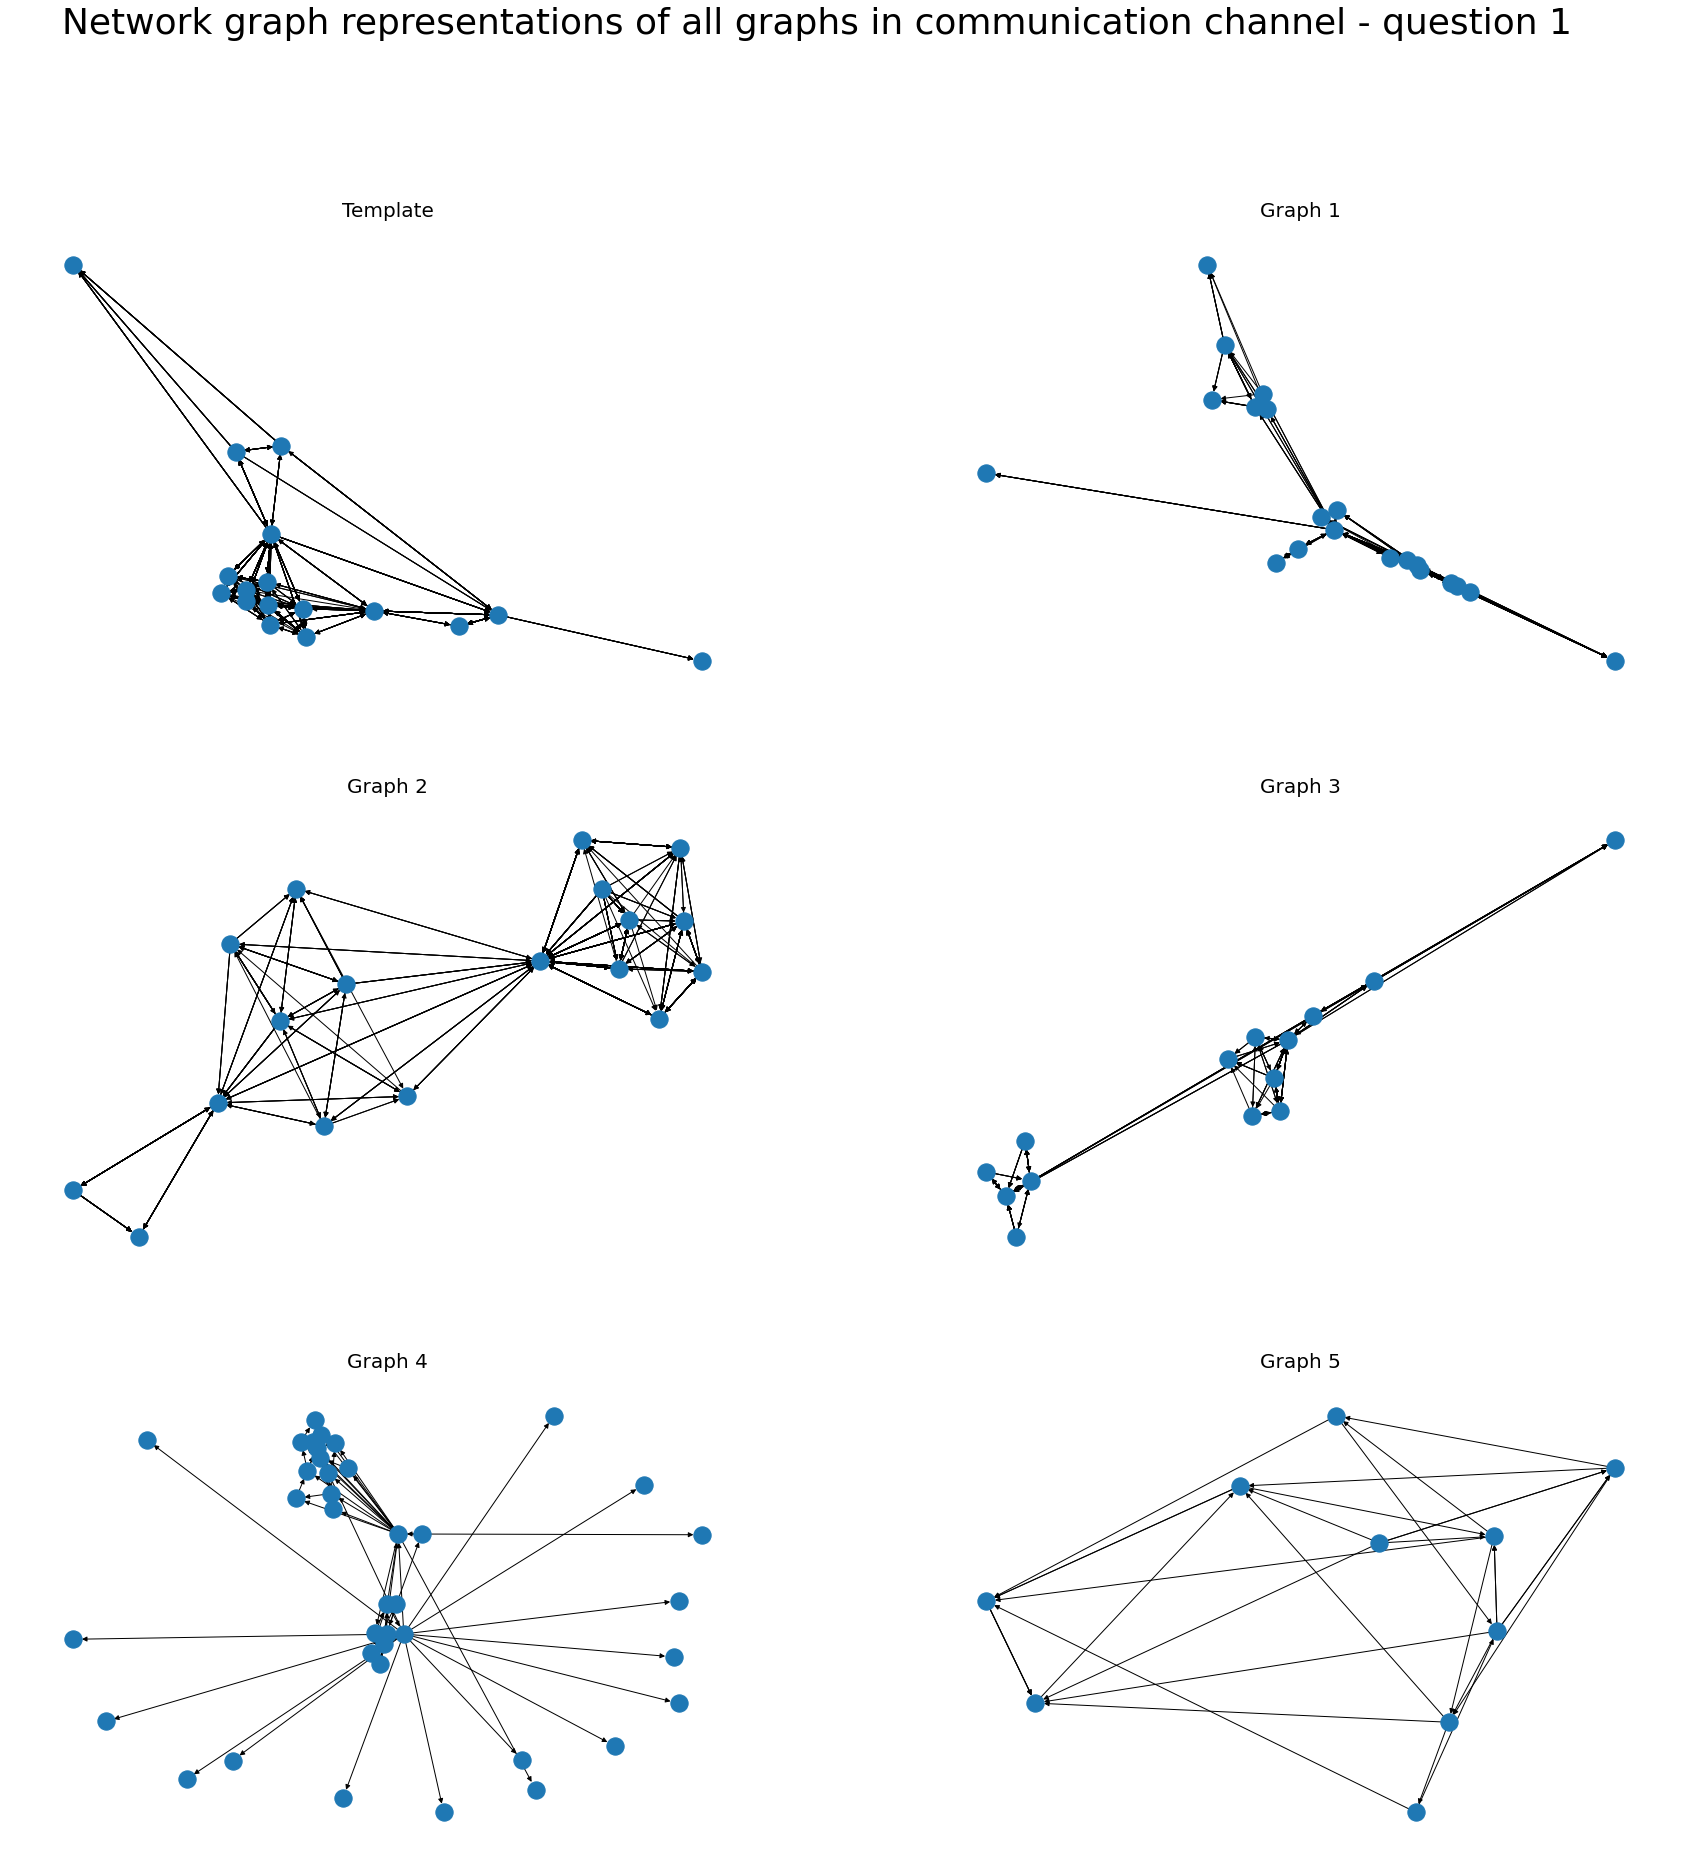

In [0]:
# Setting the graph size
f = plt.figure(figsize=(30,30))

# adding a title for the whole graph
f.suptitle('Network graph representations of all graphs in communication channel - question 1', fontsize=36)
axs = list()
# Template subplot
axs.append(f.add_subplot(321))
nx.draw(templateG, with_labels=False, font_weight='bold', ax=axs[0])
axs[0].set_title('Template', fontsize = 20)

# Graph 1
axs.append(f.add_subplot(322))
nx.draw(graph1G, with_labels=False, font_weight='bold', ax=axs[1])
axs[1].set_title('Graph 1', fontsize = 20)

# Graph 2
axs.append(f.add_subplot(323))
nx.draw(graph2G, with_labels=False, font_weight='bold', ax=axs[2])
axs[2].set_title('Graph 2', fontsize = 20)

# Graph 3
axs.append(f.add_subplot(324))
nx.draw(graph3G, with_labels=False, font_weight='bold', ax=axs[3])
axs[3].set_title('Graph 3', fontsize = 20)

# Graph 4
axs.append(f.add_subplot(325))
nx.draw(graph4G, with_labels=False, font_weight='bold', ax=axs[4])
axs[4].set_title('Graph 4', fontsize = 20)

# Graph 5
axs.append(f.add_subplot(326))
nx.draw(graph5G, with_labels=False, font_weight='bold', ax=axs[5])
axs[5].set_title('Graph 5', fontsize = 20)


plt.show()

In [0]:
graph1AdjMat = nx.adj_matrix(graph1G)

In [0]:
print(graph1AdjMat.todense())

[[0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1]
 [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]]


In [0]:
import networkx as nx
from matplotlib import pyplot, patches

def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = plt.figure(figsize=(10, 10)) # in inches
    plt.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    '''
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)'''

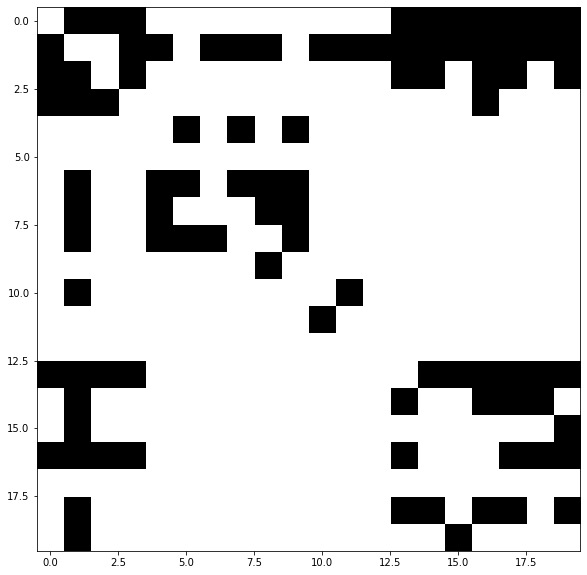

In [0]:
#from scipy import io

#A = io.mmread("Caltech.mtx")
#G = nx.from_scipy_sparse_matrix(A)
draw_adjacency_matrix(graph1G)
#draw_adjacency_matrix(graph1G2)

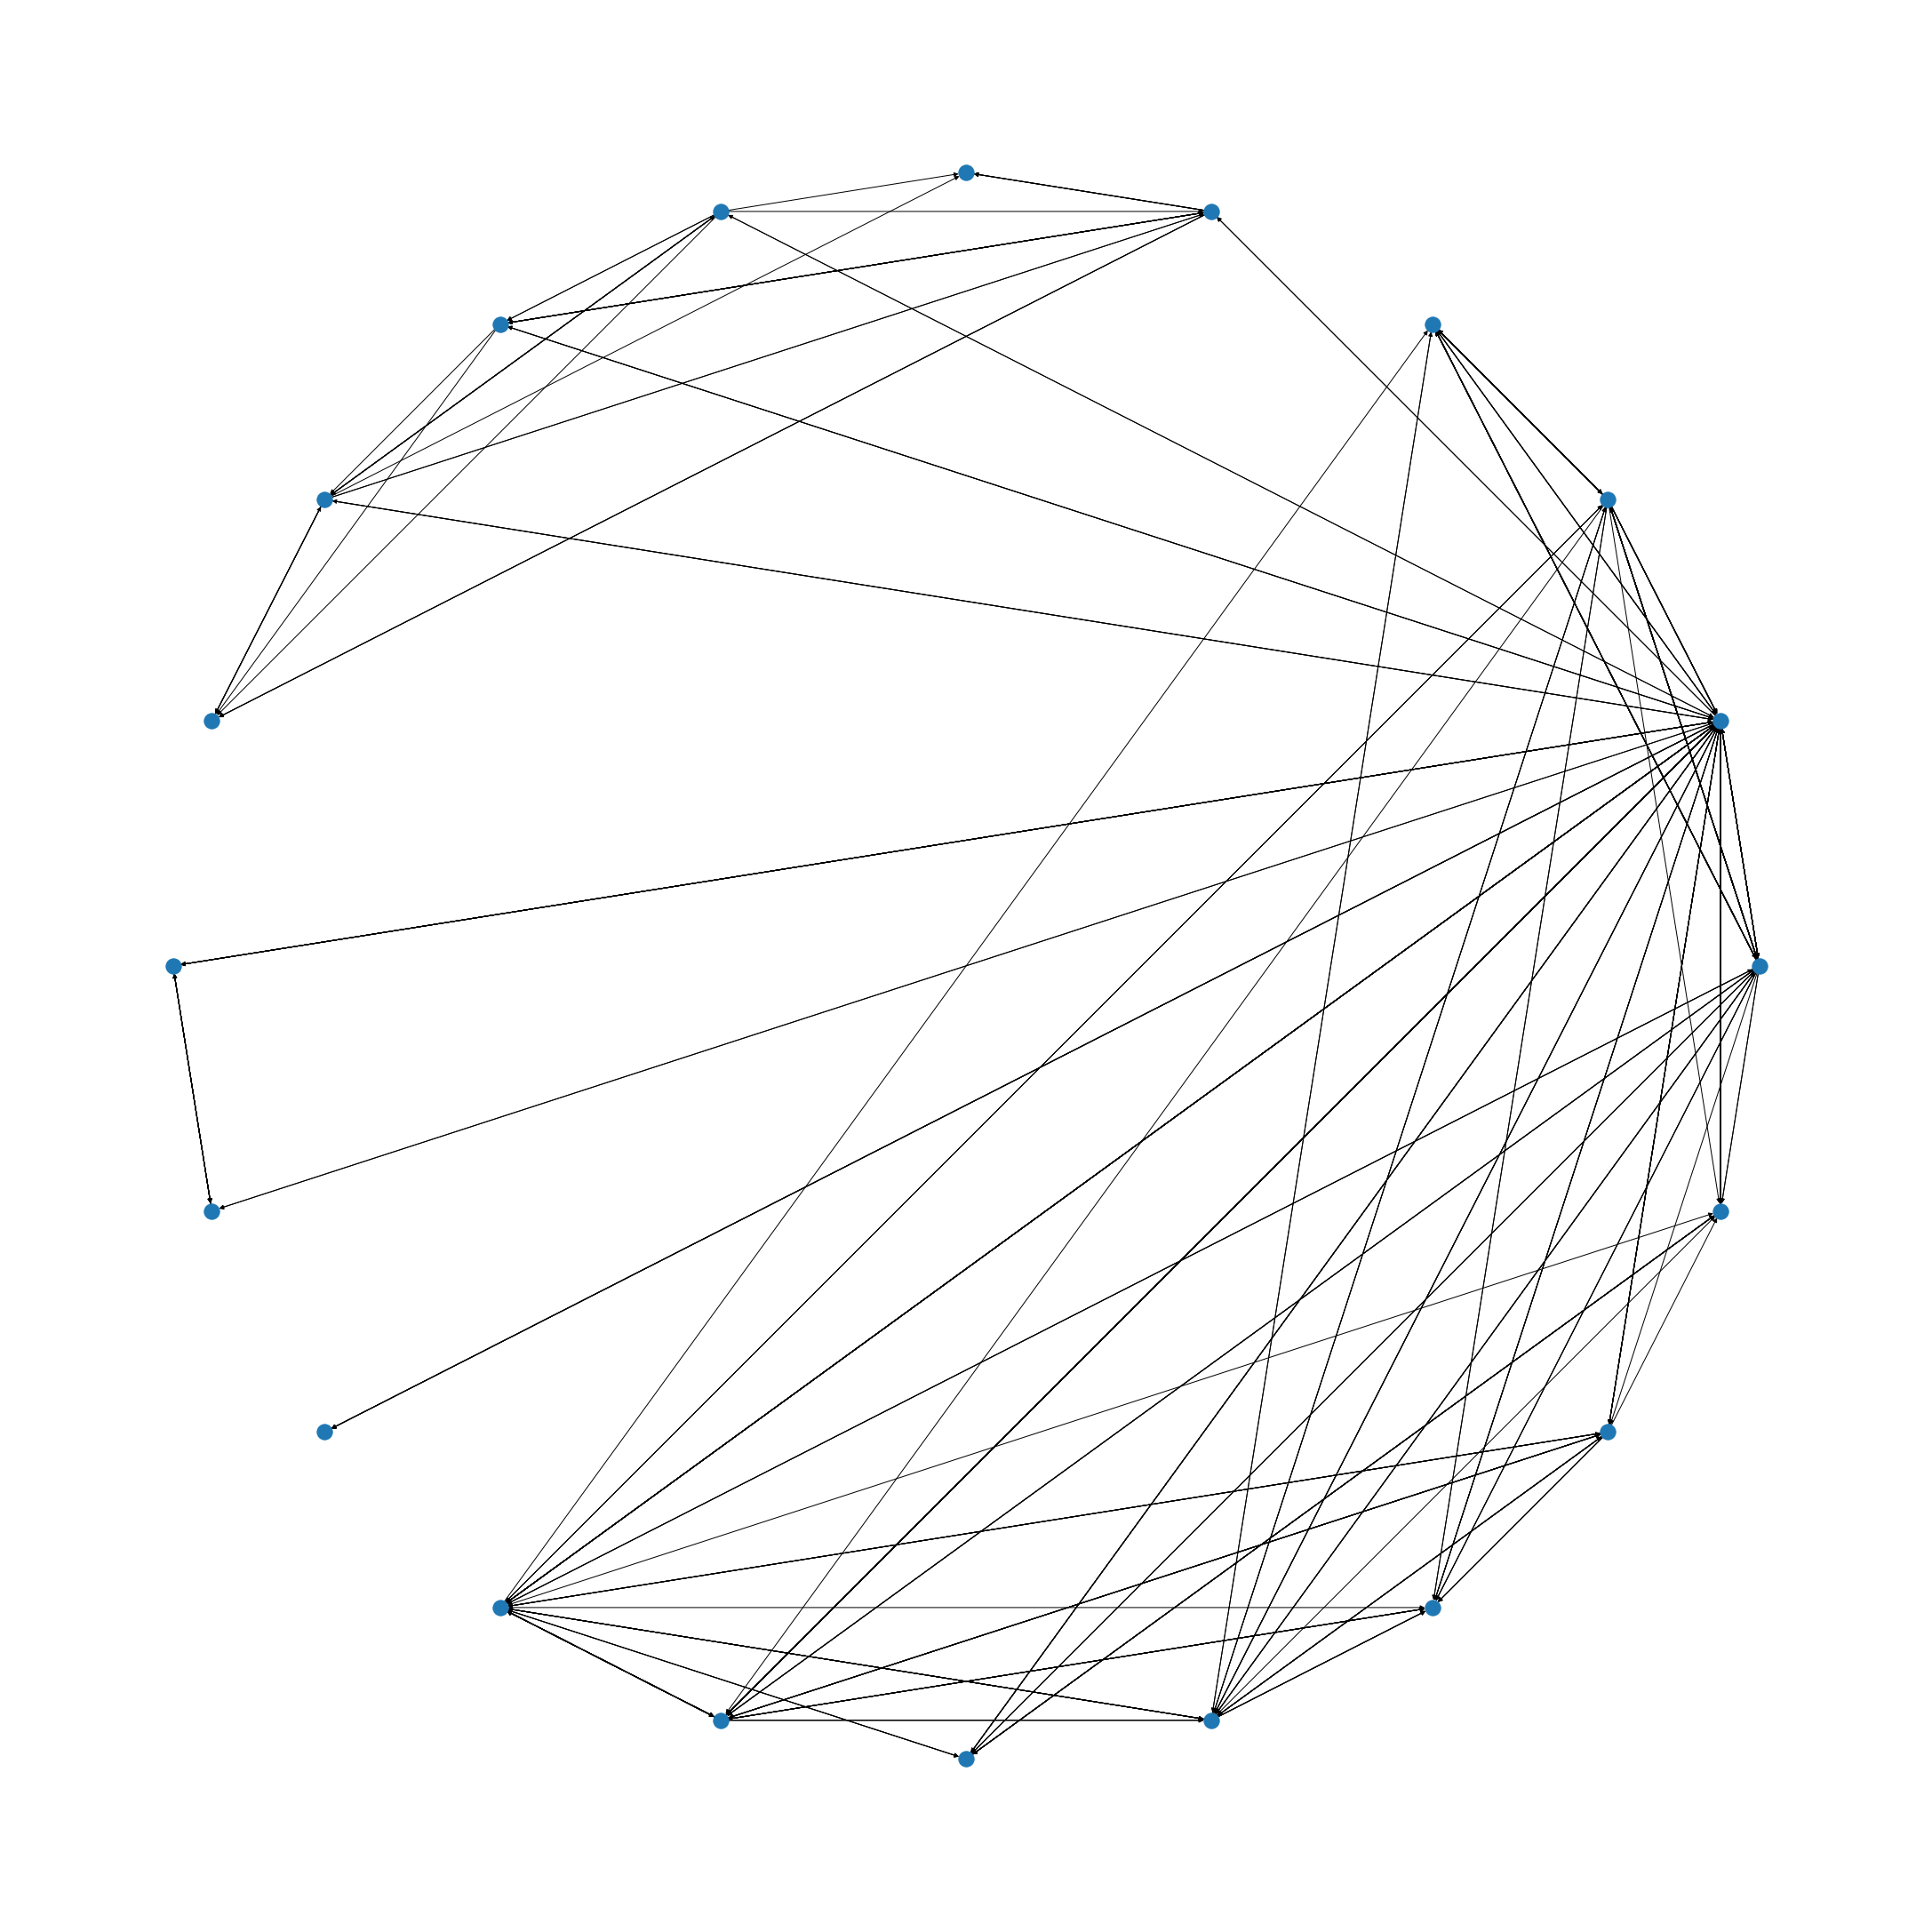

In [0]:

graph1NodesTuple2 = [tuple([x, y, z]) for x, y, z in zip(dfGraph1[(dfGraph1["eType"] == 0) | (dfGraph1["eType"] == 1)]["Source"], 
                                                  dfGraph1[(dfGraph1["eType"] == 0) | (dfGraph1["eType"] == 1)]["Target"],
                                                  dfGraph1[(dfGraph1["eType"] == 0) | (dfGraph1["eType"] == 1)]["Time"])]
graph1G2 = nx.MultiDiGraph()

graph1G2.add_weighted_edges_from(graph1NodesTuple2, weight="Time")

nx.to_edgelist(graph1G2)


#adjacency_matrix_g1 = nx.to_numpy_matrix(graph1G2, dtype=np.bool, nodelist=None)
#figadj1 = px.density_heatmap(adjacency_matrix_g1)
#%matplotlib inline
#figadj1.show()
#figadj1.write_html("drive/My Drive/images/adjacencyheatmap1.html")
#print(adjacency_matrix_g1)
#figadj1 = plt.figure(figsize=(10, 10))
#plt.imshow(adjacency_matrix_g1, cmap="Greys", interpolation="none")
#plt.show()
figadj1 = plt.figure(figsize=(30, 30))
nx.draw_circular(graph1G2, with_labels=False, font_weight='bold')
plt.show()

In [0]:
#adjacency_matrix_g1

matrix([[False,  True,  True,  True, False, False, False, False, False,
         False, False, False, False,  True,  True,  True,  True,  True,
          True,  True],
        [ True, False, False,  True,  True, False,  True,  True,  True,
         False,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True],
        [ True,  True, False,  True, False, False, False, False, False,
         False, False, False, False,  True,  True, False,  True,  True,
         False,  True],
        [ True,  True,  True, False, False, False, False, False, False,
         False, False, False, False, False, False, False,  True, False,
         False, False],
        [False, False, False, False, False,  True, False,  True, False,
          True, False, False, False, False, False, False, False, False,
         False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, 

In [0]:
import numpy as np
from collections import defaultdict

def assignmentArray_to_lists(assignment_array):
    by_attribute_value = defaultdict(list)
    for node_index, attribute_value in enumerate(assignment_array):
        by_attribute_value[attribute_value].append(node_index)
    return by_attribute_value.values()

# Load in array which maps node index to dorm number
# Convert this to a list of lists indicating dorm membership
dorm_assignment = np.genfromtxt("caltech_dorms_blanksInferred.txt", dtype="u4")
dorm_lists = assignmentArray_to_lists(dorm_assignment)

# Create a list of all nodes sorted by dorm, and plot
# adjacency matrix with this ordering
nodes_dorm_ordered = [node for dorm in dorm_lists for node in dorm]
draw_adjacency_matrix(G, nodes_dorm_ordered, [dorm_lists],["blue"])

In [0]:
# px.density_mapbox(graph1AdjMat)
graph1AdjMat

<20x20 sparse matrix of type '<class 'numpy.longlong'>'
	with 126 stored elements in Compressed Sparse Row format>

#### test ordering dataframes based on time

In [0]:
dfGraph5test = pd.read_csv('drive/My Drive/data/Q1-Graph5.csv')

In [0]:
print(dfGraph5test[["Source", "Time"]])
dfGraph5test.sort_values(by='Time', ascending=False, na_position='first')
print(dfGraph5test["Time"])

     Source      Time
0    619322     96346
1    594308    105656
2    524153    307922
3    524153    449990
4    619322    634562
..      ...       ...
390  573137  31536000
391  573137  31536000
392  573137  31536000
393  573137  31536000
394  552988  31536000

[395 rows x 2 columns]
0         96346
1        105656
2        307922
3        449990
4        634562
         ...   
390    31536000
391    31536000
392    31536000
393    31536000
394    31536000
Name: Time, Length: 395, dtype: int64


In [0]:
G = graph1G
#graph1G = nx.Graph()
#nx.G
#G = nx.random_geometric_graph(200, 0.125)
pos = nx.nx_pydot.graphviz_layout(G)
edge_x = []
edge_y = []
for edge in G.edges():
    
    # x0, y0 = G.nodes[edge[0]]['pos']
    # x1, y1 = G.nodes[edge[1]]['pos']
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='Blues',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

NameError: ignored

In [0]:
#G = graph1G
#graph1G = nx.Graph()
#nx.G
#G = nx.random_geometric_graph(200, 0.125)

graph1G2 = nx.MultiDiGraph()

graph1G2.add_weighted_edges_from(graph1NodesTuple2, weight="Time")
pos = nx.spring_layout(graph1G2)
edge_x = []
edge_y = []
G = graph1G2
for edge in G.edges():
    print(G.nodes[edge[0]], end=',')
    # x0, y0 = G.nodes[edge[0]]['pos']
    # x1, y1 = G.nodes[edge[1]]['pos']

(599956, 635665),(599956, 635665),(599956, 635665),(599956, 635665),(599956, 635665),(599956, 635665),(599956, 635665),(599956, 635665),(599956, 635665),(599956, 635665),(599956, 635665),(599956, 635665),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 490041),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 589639),(599956, 492777),(599956, 492777),(599956, 492777),(599956, 492777),(599956, 570411),(599956, 570411),(599956, 570411),(599956, 570411),(599956, 493044),(599956, 493044),(599956, 493044),(599956, 640464),(599956, 640464),(599956, 596193),(599956, 623295),(599956, 623295),(599956, 550361),(599956, 550361),(599956, 550361),(635665, 56809

In [0]:
G = graph1G
pos = nx.nx_pydot.graphviz_layout(G)
print(nx.info(graph1G))
print(pos)

Name: 
Type: MultiDiGraph
Number of nodes: 20
Number of edges: 318
Average in degree:  15.9000
Average out degree:  15.9000
{599956: (200.07, 227.97), 635665: (162.99, 163.75), 490041: (140.82, 215.72), 589639: (131.21, 261.62), 533140: (182.08, 81.735), 591682: (117.09, 18.0), 568093: (129.72, 91.602), 616050: (212.05, 100.19), 632150: (153.58, 78.649), 464459: (198.84, 21.884), 512397: (75.05, 132.73), 550287: (61.056, 175.1), 559657: (260.61, 144.13), 623295: (194.58, 251.76), 492777: (155.7, 265.01), 570411: (256.58, 210.56), 550361: (174.13, 210.92), 493044: (108.06, 236.31), 596193: (129.98, 195.75), 640464: (217.82, 184.21)}


In [0]:
pos[464459]

(198.84, 21.884)

In [0]:
for edge in G.edges():
  print(edge[0], edge[1])

599956 635665
599956 635665
599956 635665
599956 635665
599956 635665
599956 635665
599956 635665
599956 635665
599956 635665
599956 635665
599956 635665
599956 635665
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 490041
599956 589639
599956 589639
599956 589639
599956 589639
599956 589639
599956 589639
599956 589639
599956 589639
599956 589639
599956 589639
599956 589639
599956 589639
599956 589639
599956 492777
599956 492777
599956 492777
599956 492777
599956 570411
599956 570411
599956 570411
599956 570411
599956 493044
599956 493044
599956 493044
599956 640464
599956 640464
599956 596193
599956 623295
599956 623295
599956 550361
599956 550361
599956 550361
635665 568093
635665 512397
635665 512397
635665 512397
635665 512397
635665 512397
635665 550287
635665 550287
635665 559657
635665 559657
635665 559657
635665 559657
635665 559657
635665

In [0]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [0]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
#fig.show()


In [0]:
fig.write_html("drive/My Drive/images/testGraph1.html")

In [0]:
drawingTemplate = nx.draw_circular(templateG, with_labels=False, font_weight='bold', ax=axs[0])